In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

In [2]:
BATCH_SIZE = 60
IMG_SIZE = (224, 224)
train_dataset = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/classifier_intersections/simulated_intersections",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)
                                                            
validation_dataset_D = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/test_sets/D",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_D = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/cross_validation_sets/ABC",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

validation_dataset_C = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/test_sets/C",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_C = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/cross_validation_sets/ABD",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)                                                           

validation_dataset_B = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/test_sets/B",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_B = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/cross_validation_sets/ACD",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

validation_dataset_A = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/test_sets/A",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_A = tf.keras.utils.image_dataset_from_directory("D:/project/extracted data sets/kaggle_intersections/cross_validation_sets/BCD",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

Found 10000 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.


In [3]:
validation_dataset_A.class_names == train_dataset.class_names
validation_dataset_B.class_names == train_dataset.class_names
validation_dataset_C.class_names == train_dataset.class_names
validation_dataset_D.class_names == train_dataset.class_names

True

In [4]:
class_names = train_dataset.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [5]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_D))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_C))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_B))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_A))

Number of train batches: 167
Number of validation batches: 9
Number of validation batches: 9
Number of validation batches: 9
Number of validation batches: 9


In [6]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomRotation(0.7),
])

In [7]:
preprocess_input = tf.keras.applications.nasnet.preprocess_input

In [8]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.NASNetMobile(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [9]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(60, 7, 7, 1056)


In [10]:
base_model.trainable = False

In [11]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(60, 1056)


In [12]:
prediction_layer = tf.keras.layers.Dense(4, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(60, 4)


In [13]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model_D = tf.keras.Model(inputs, outputs)
model_C = tf.keras.Model(inputs, outputs)
model_B = tf.keras.Model(inputs, outputs)
model_A = tf.keras.Model(inputs, outputs)

In [14]:
base_learning_rate = 0.0001
model_D.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)
model_C.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)
model_B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)
model_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)

In [15]:
initial_epochs = 5
history_D = model_D.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 293s 2s/step - loss: 1.3620 - accuracy: 0.3848
Epoch 2/5
167/167 [==============================] - 286s 2s/step - loss: 1.0337 - accuracy: 0.5628
Epoch 3/5
167/167 [==============================] - 287s 2s/step - loss: 0.8582 - accuracy: 0.6595
Epoch 4/5
167/167 [==============================] - 286s 2s/step - loss: 0.7488 - accuracy: 0.7135
Epoch 5/5
167/167 [==============================] - 287s 2s/step - loss: 0.6667 - accuracy: 0.7564


In [16]:
val_images_D =[]
true_labels_D = []
for image, label in validation_dataset_D.unbatch():
    val_images_D.append(image)
    true_labels_D.append(label)
val_images_D = np.array(val_images_D)
true_labels_D = np.array(true_labels_D)    

In [17]:
predictions_D = model_D.predict(val_images_D)
predict_labels_D = predictions_D.argmax(axis=1)

16/16 [==============================] - 17s 891ms/step


In [18]:
loss, acc = model_D.evaluate(val_images_D, true_labels_D)
print("Accuracy model D: {:5.2f}%".format(100 * acc))

16/16 [==============================] - 18s 894ms/step - loss: 1.3525 - accuracy: 0.4180
Accuracy model D: 41.80%


In [15]:
initial_epochs = 5
history_C = model_C.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 294s 2s/step - loss: 1.3006 - accuracy: 0.4098
Epoch 2/5
167/167 [==============================] - 285s 2s/step - loss: 1.0005 - accuracy: 0.5718
Epoch 3/5
167/167 [==============================] - 286s 2s/step - loss: 0.8437 - accuracy: 0.6598
Epoch 4/5
167/167 [==============================] - 286s 2s/step - loss: 0.7358 - accuracy: 0.7171
Epoch 5/5
167/167 [==============================] - 287s 2s/step - loss: 0.6708 - accuracy: 0.7473


In [16]:
val_images_C =[]
true_labels_C = []
for image, label in validation_dataset_C.unbatch():
    val_images_C.append(image)
    true_labels_C.append(label)
val_images_C = np.array(val_images_C)
true_labels_C = np.array(true_labels_C) 

In [17]:
predictions_C = model_C.predict(val_images_C)
predict_labels_C = predictions_C.argmax(axis=1)

16/16 [==============================] - 17s 884ms/step


In [18]:
loss, acc = model_C.evaluate(val_images_C, true_labels_C)
print("Accuracy mode C: {:5.2f}%".format(100 * acc))

16/16 [==============================] - 17s 888ms/step - loss: 1.2634 - accuracy: 0.4140
Accuracy mode C: 41.40%


In [16]:
initial_epochs = 5
history_B = model_B.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 295s 2s/step - loss: 1.3534 - accuracy: 0.3728
Epoch 2/5
167/167 [==============================] - 283s 2s/step - loss: 1.0245 - accuracy: 0.5630
Epoch 3/5
167/167 [==============================] - 285s 2s/step - loss: 0.8580 - accuracy: 0.6534
Epoch 4/5
167/167 [==============================] - 283s 2s/step - loss: 0.7511 - accuracy: 0.7077
Epoch 5/5
167/167 [==============================] - 283s 2s/step - loss: 0.6705 - accuracy: 0.7494


In [17]:
val_images_B =[]
true_labels_B = []
for image, label in validation_dataset_B.unbatch():
    val_images_B.append(image)
    true_labels_B.append(label)
val_images_B = np.array(val_images_B)
true_labels_B = np.array(true_labels_B) 

In [18]:
predictions_B = model_B.predict(val_images_B)
predict_labels_B = predictions_B.argmax(axis=1)

16/16 [==============================] - 17s 892ms/step


In [19]:
loss, acc = model_B.evaluate(val_images_B, true_labels_B)
print("Accuracy model B: {:5.2f}%".format(100 * acc))

16/16 [==============================] - 17s 883ms/step - loss: 1.1276 - accuracy: 0.5040
Accuracy model B: 50.40%


In [15]:
initial_epochs = 5
history_A = model_A.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 303s 2s/step - loss: 1.2834 - accuracy: 0.4128
Epoch 2/5
167/167 [==============================] - 297s 2s/step - loss: 0.9797 - accuracy: 0.5951
Epoch 3/5
167/167 [==============================] - 300s 2s/step - loss: 0.8213 - accuracy: 0.6769
Epoch 4/5
167/167 [==============================] - 306s 2s/step - loss: 0.7186 - accuracy: 0.7297
Epoch 5/5
167/167 [==============================] - 292s 2s/step - loss: 0.6438 - accuracy: 0.7674


In [16]:
val_images_A =[]
true_labels_A = []
for image, label in validation_dataset_A.unbatch():
    val_images_A.append(image)
    true_labels_A.append(label)
val_images_A = np.array(val_images_A)
true_labels_A = np.array(true_labels_A) 

In [17]:
predictions_A = model_A.predict(val_images_A)
predict_labels_A = predictions_A.argmax(axis=1)

16/16 [==============================] - 18s 899ms/step


In [18]:
loss, acc = model_A.evaluate(val_images_A, true_labels_A)
print("Accuracy model A: {:5.2f}%".format(100 * acc))

16/16 [==============================] - 18s 905ms/step - loss: 1.3124 - accuracy: 0.4020
Accuracy model A: 40.20%


In [19]:
base_model.trainable = True

In [20]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  769


In [21]:
fine_tune_at = 170
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [22]:
base_learning_rate = 0.0001
model_D.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model_C.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model_B.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model_A.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [23]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_D = model_D.fit(cross_dataset_D,
                         epochs=total_epochs,
                         initial_epoch=history_D.epoch[-1],
                         validation_data=validation_dataset_D)

Epoch 5/15
25/25 [==============================] - 160s 5s/step - loss: 0.9411 - accuracy: 0.6040 - val_loss: 0.8303 - val_accuracy: 0.6380
Epoch 6/15
25/25 [==============================] - 129s 5s/step - loss: 0.6638 - accuracy: 0.7440 - val_loss: 0.7183 - val_accuracy: 0.6840
Epoch 7/15
25/25 [==============================] - 128s 5s/step - loss: 0.5381 - accuracy: 0.8013 - val_loss: 0.6174 - val_accuracy: 0.7620
Epoch 8/15
25/25 [==============================] - 131s 5s/step - loss: 0.4281 - accuracy: 0.8453 - val_loss: 0.6094 - val_accuracy: 0.7600
Epoch 9/15
25/25 [==============================] - 141s 6s/step - loss: 0.3499 - accuracy: 0.8680 - val_loss: 0.5980 - val_accuracy: 0.7820
Epoch 10/15
25/25 [==============================] - 139s 6s/step - loss: 0.2842 - accuracy: 0.9020 - val_loss: 0.5241 - val_accuracy: 0.8120
Epoch 11/15
25/25 [==============================] - 141s 6s/step - loss: 0.2404 - accuracy: 0.9180 - val_loss: 0.4828 - val_accuracy: 0.8240
Epoch 12/15

In [24]:
val_images_D =[]
true_labels_D = []
for image, label in validation_dataset_D.unbatch():
    val_images_D.append(image)
    true_labels_D.append(label)
val_images_D = np.array(val_images_D)
true_labels_D = np.array(true_labels_D)    

In [25]:
predictions_D = model_D.predict(val_images_D)
predict_labels_D = predictions_D.argmax(axis=1)

16/16 [==============================] - 18s 921ms/step


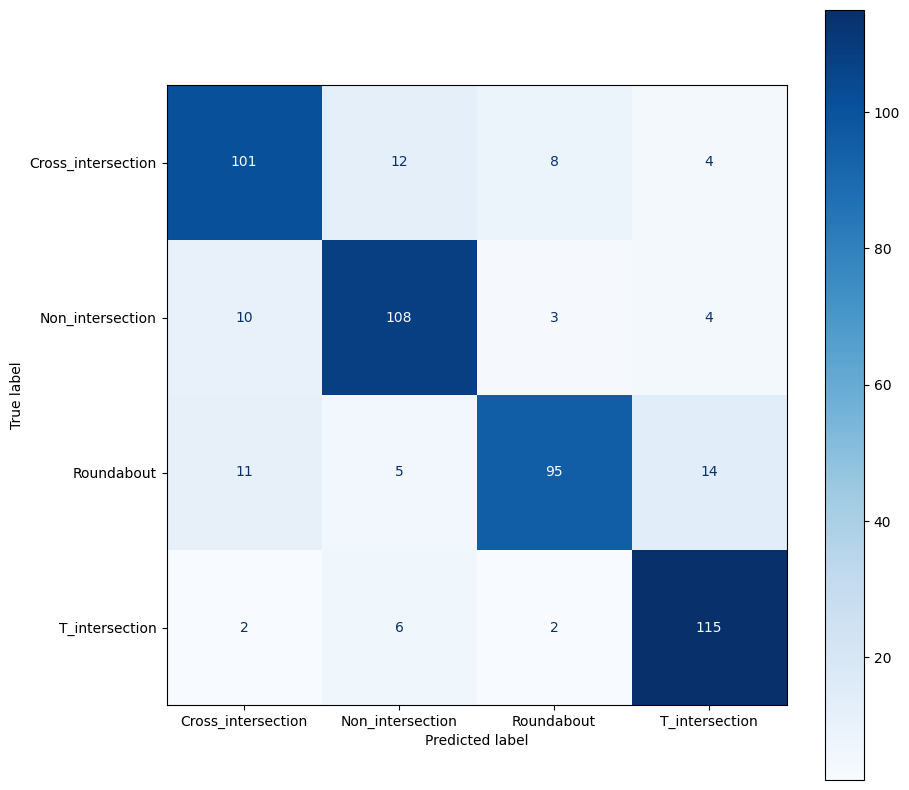

In [26]:
intersections = validation_dataset_D.class_names
cm = confusion_matrix(true_labels_D, predict_labels_D)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [27]:
loss, acc = model_D.evaluate(val_images_D, true_labels_D, verbose=2)
print("Accuracy model D: {:5.2f}%".format(100 * acc))

16/16 - 15s - loss: 0.4999 - accuracy: 0.8380 - 15s/epoch - 937ms/step
Accuracy model D: 83.80%


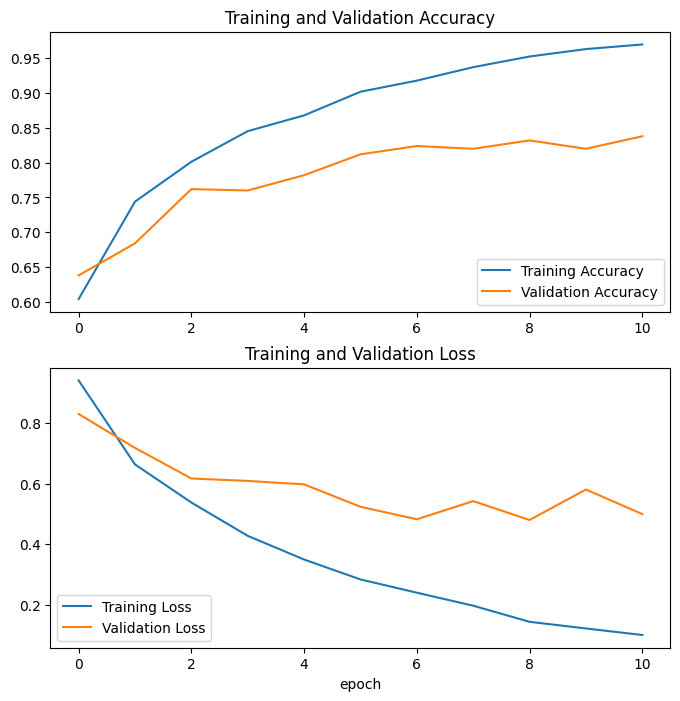

In [28]:
acc = history_fine_D.history['accuracy']
val_acc = history_fine_D.history['val_accuracy']

loss = history_fine_D.history['loss']
val_loss = history_fine_D.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.savefig('train_Mb_V3/acc_loss.jpg')
plt.show()

In [29]:
model_D.save('D:/project/models/nasnetmodel_kaggle/D')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/D\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/D\assets


In [23]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_C = model_C.fit(cross_dataset_C,
                         epochs=total_epochs,
                         initial_epoch=history_C.epoch[-1],
                         validation_data=validation_dataset_C)

Epoch 5/15
25/25 [==============================] - 159s 5s/step - loss: 1.0317 - accuracy: 0.5847 - val_loss: 0.6936 - val_accuracy: 0.7400
Epoch 6/15
25/25 [==============================] - 125s 5s/step - loss: 0.7355 - accuracy: 0.7320 - val_loss: 0.5829 - val_accuracy: 0.7860
Epoch 7/15
25/25 [==============================] - 126s 5s/step - loss: 0.5902 - accuracy: 0.7740 - val_loss: 0.4692 - val_accuracy: 0.8260
Epoch 8/15
25/25 [==============================] - 126s 5s/step - loss: 0.4877 - accuracy: 0.8133 - val_loss: 0.4254 - val_accuracy: 0.8360
Epoch 9/15
25/25 [==============================] - 127s 5s/step - loss: 0.4258 - accuracy: 0.8367 - val_loss: 0.3752 - val_accuracy: 0.8620
Epoch 10/15
25/25 [==============================] - 126s 5s/step - loss: 0.3646 - accuracy: 0.8680 - val_loss: 0.3405 - val_accuracy: 0.8740
Epoch 11/15
25/25 [==============================] - 126s 5s/step - loss: 0.2920 - accuracy: 0.8927 - val_loss: 0.3195 - val_accuracy: 0.8720
Epoch 12/15

In [24]:
val_images_C =[]
true_labels_C = []
for image, label in validation_dataset_C.unbatch():
    val_images_C.append(image)
    true_labels_C.append(label)
val_images_C = np.array(val_images_C)
true_labels_C = np.array(true_labels_C) 

In [25]:
predictions_C = model_C.predict(val_images_C)
predict_labels_C = predictions_C.argmax(axis=1)

16/16 [==============================] - 18s 909ms/step


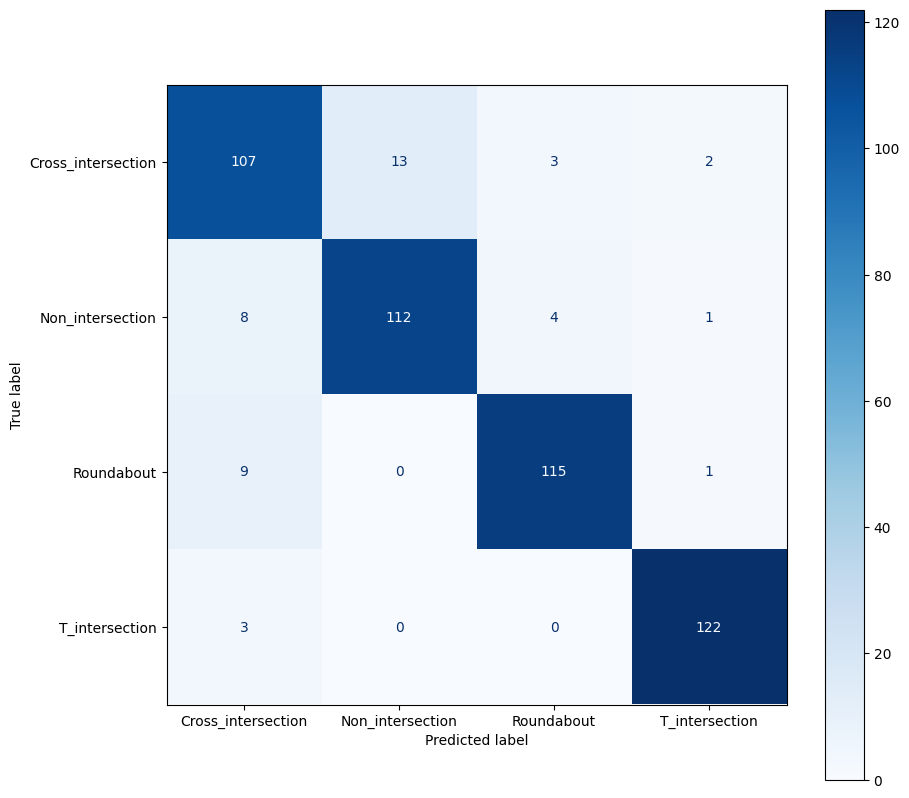

In [26]:
intersections = validation_dataset_C.class_names
cm = confusion_matrix(true_labels_C, predict_labels_C)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [27]:
loss, acc = model_C.evaluate(val_images_C, true_labels_C, verbose=2)
print("Accuracy model C: {:5.2f}%".format(100 * acc))

16/16 - 15s - loss: 0.2428 - accuracy: 0.9120 - 15s/epoch - 917ms/step
Accuracy model C: 91.20%


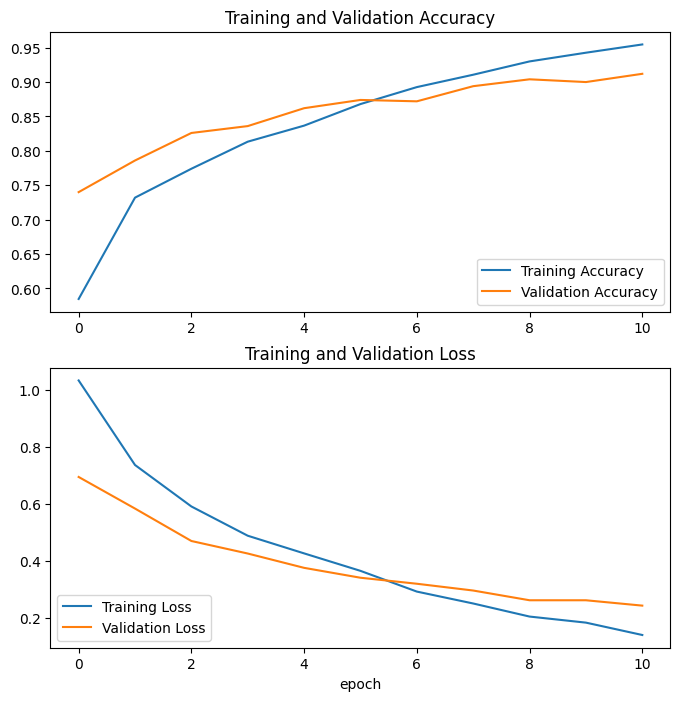

In [28]:
acc = history_fine_C.history['accuracy']
val_acc = history_fine_C.history['val_accuracy']

loss = history_fine_C.history['loss']
val_loss = history_fine_C.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.savefig('train_Mb_V3/acc_loss.jpg')
plt.show()

In [29]:
model_C.save('D:/project/models/nasnetmodel_kaggle/C')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/C\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/C\assets


In [25]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_B = model_B.fit(cross_dataset_B,
                         epochs=total_epochs,
                         initial_epoch=history_B.epoch[-1],
                         validation_data=validation_dataset_B)

Epoch 5/15
25/25 [==============================] - 157s 5s/step - loss: 1.0435 - accuracy: 0.5647 - val_loss: 0.7331 - val_accuracy: 0.7380
Epoch 6/15
25/25 [==============================] - 125s 5s/step - loss: 0.7438 - accuracy: 0.7027 - val_loss: 0.6103 - val_accuracy: 0.7900
Epoch 7/15
25/25 [==============================] - 125s 5s/step - loss: 0.5754 - accuracy: 0.7840 - val_loss: 0.5494 - val_accuracy: 0.8160
Epoch 8/15
25/25 [==============================] - 126s 5s/step - loss: 0.4776 - accuracy: 0.8287 - val_loss: 0.5128 - val_accuracy: 0.8240
Epoch 9/15
25/25 [==============================] - 126s 5s/step - loss: 0.3903 - accuracy: 0.8633 - val_loss: 0.4296 - val_accuracy: 0.8460
Epoch 10/15
25/25 [==============================] - 126s 5s/step - loss: 0.3208 - accuracy: 0.8860 - val_loss: 0.4414 - val_accuracy: 0.8360
Epoch 11/15
25/25 [==============================] - 126s 5s/step - loss: 0.2611 - accuracy: 0.9133 - val_loss: 0.4060 - val_accuracy: 0.8560
Epoch 12/15

In [26]:
val_images_B =[]
true_labels_B = []
for image, label in validation_dataset_B.unbatch():
    val_images_B.append(image)
    true_labels_B.append(label)
val_images_B = np.array(val_images_B)
true_labels_B = np.array(true_labels_B) 

In [27]:
predictions_B = model_B.predict(val_images_B)
predict_labels_B = predictions_B.argmax(axis=1)

16/16 [==============================] - 17s 900ms/step


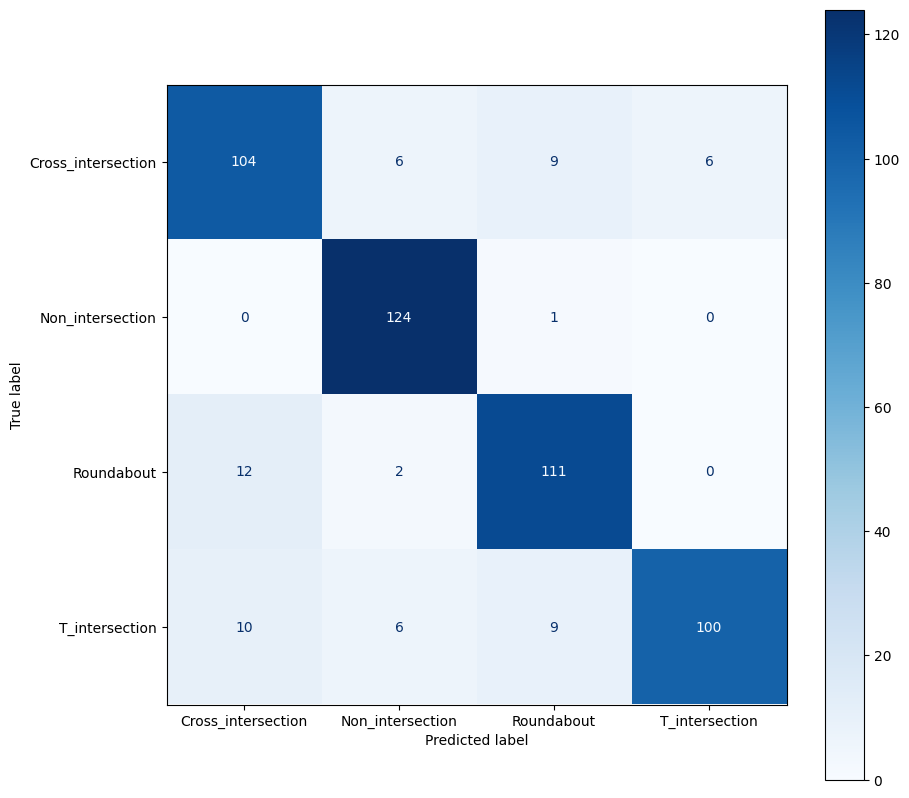

In [28]:
intersections = validation_dataset_B.class_names
cm = confusion_matrix(true_labels_B, predict_labels_B)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [29]:
loss, acc = model_B.evaluate(val_images_B, true_labels_B, verbose=2)
print("Accuracy model B: {:5.2f}%".format(100 * acc))

16/16 - 14s - loss: 0.3909 - accuracy: 0.8780 - 14s/epoch - 904ms/step
Accuracy model B: 87.80%


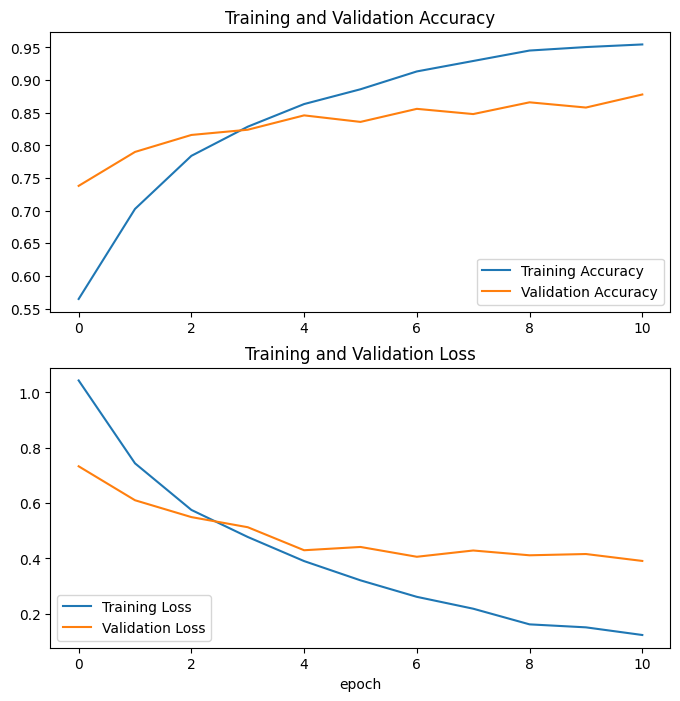

In [30]:
acc = history_fine_B.history['accuracy']
val_acc = history_fine_B.history['val_accuracy']

loss = history_fine_B.history['loss']
val_loss = history_fine_B.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.savefig('train_Mb_V3/acc_loss.jpg')
plt.show()

In [31]:
model_B.save('D:/project/models/nasnetmodel_kaggle/B')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/B\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/B\assets


In [23]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_A = model_A.fit(cross_dataset_A,
                         epochs=total_epochs,
                         initial_epoch=history_A.epoch[-1],
                         validation_data=validation_dataset_A)

Epoch 5/15
25/25 [==============================] - 164s 5s/step - loss: 1.0055 - accuracy: 0.5800 - val_loss: 0.8486 - val_accuracy: 0.6700
Epoch 6/15
25/25 [==============================] - 129s 5s/step - loss: 0.7243 - accuracy: 0.7187 - val_loss: 0.7274 - val_accuracy: 0.7180
Epoch 7/15
25/25 [==============================] - 128s 5s/step - loss: 0.5758 - accuracy: 0.7880 - val_loss: 0.6788 - val_accuracy: 0.7300
Epoch 8/15
25/25 [==============================] - 128s 5s/step - loss: 0.4656 - accuracy: 0.8340 - val_loss: 0.6409 - val_accuracy: 0.7540
Epoch 9/15
25/25 [==============================] - 129s 5s/step - loss: 0.3997 - accuracy: 0.8633 - val_loss: 0.5767 - val_accuracy: 0.7720
Epoch 10/15
25/25 [==============================] - 128s 5s/step - loss: 0.3317 - accuracy: 0.8813 - val_loss: 0.5077 - val_accuracy: 0.8140
Epoch 11/15
25/25 [==============================] - 129s 5s/step - loss: 0.2563 - accuracy: 0.9100 - val_loss: 0.5016 - val_accuracy: 0.8120
Epoch 12/15

In [24]:
val_images_A =[]
true_labels_A = []
for image, label in validation_dataset_A.unbatch():
    val_images_A.append(image)
    true_labels_A.append(label)
val_images_A = np.array(val_images_A)
true_labels_A = np.array(true_labels_A) 

In [25]:
predictions_A = model_A.predict(val_images_A)
predict_labels_A = predictions_A.argmax(axis=1)

16/16 [==============================] - 18s 921ms/step


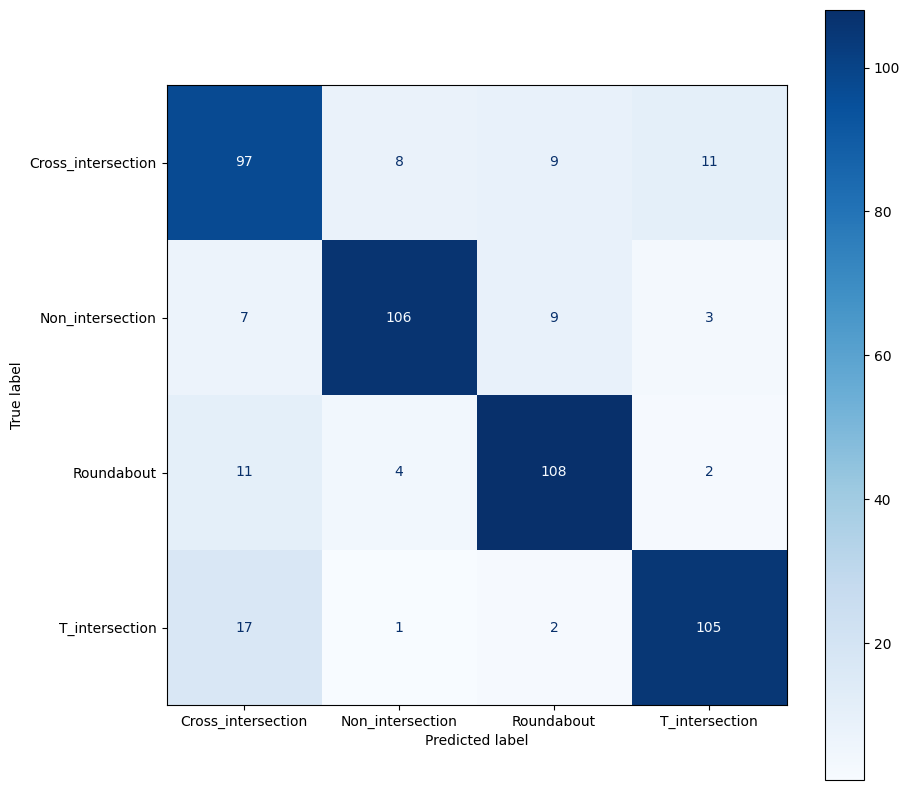

In [26]:
intersections = validation_dataset_A.class_names
cm = confusion_matrix(true_labels_A, predict_labels_A)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [27]:
loss, acc = model_A.evaluate(val_images_A, true_labels_A, verbose=2)
print("Accuracy model A: {:5.2f}%".format(100 * acc))

16/16 - 15s - loss: 0.4554 - accuracy: 0.8320 - 15s/epoch - 949ms/step
Accuracy model A: 83.20%


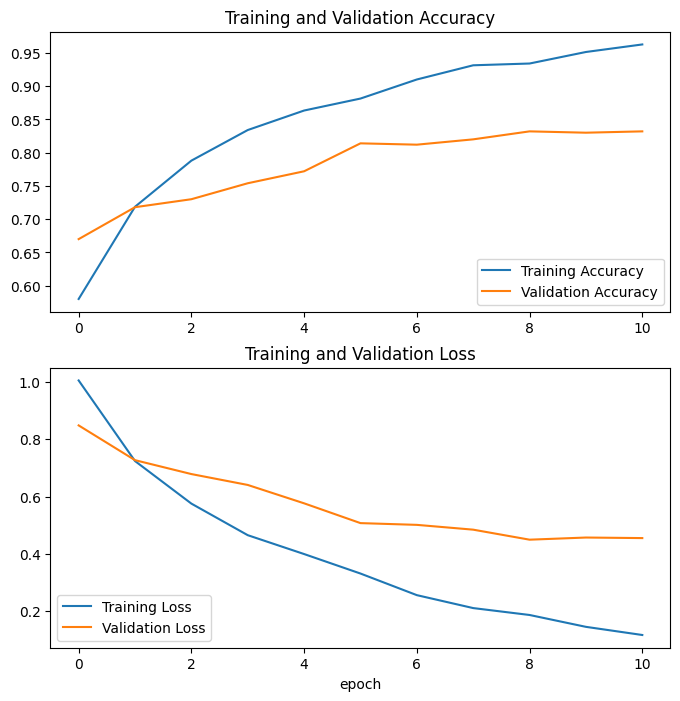

In [28]:
acc = history_fine_A.history['accuracy']
val_acc = history_fine_A.history['val_accuracy']

loss = history_fine_A.history['loss']
val_loss = history_fine_A.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.savefig('train_Mb_V3/acc_loss.jpg')
plt.show()

In [29]:
# # save model
model_A.save('D:/project/models/nasnetmodel_kaggle/A')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/A\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel_kaggle/A\assets
